<a href="https://colab.research.google.com/github/mosaabseta/ML/blob/main/bone_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os 

In [ ]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/bone_classifier/train/fractured/fractured.jpeg")

(167, 301, 3)

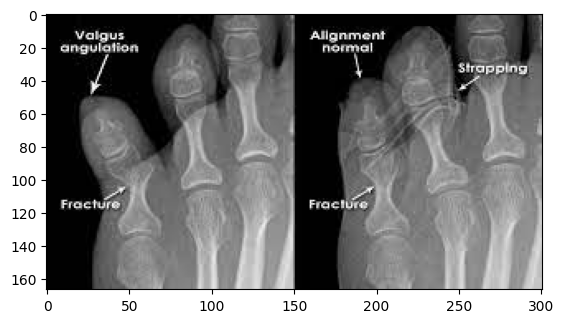

In [ ]:
plt.imshow(img)
cv2.imread("/content/drive/MyDrive/Colab Notebooks/bone_classifier/train/fractured/fractured.jpeg").shape
# im = np.array([example[image].nump() [:,:,0] for example in img]). // need to jpg to complete

rescale then generate dataset and resize 

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

ds_train = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/bone_classifier/train",
                                     target_size =(250,250),
                                     batch_size =3,
                                     class_mode =("binary"))
ds_validate = validation.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/bone_classifier/validation",
                                     target_size =(250,250),
                                     batch_size =3,
                                     class_mode =("binary"))

Found 22 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
ds_train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
ds_train.class_indices

{'fractured': 0, 'not_fractured': 1}

In [ ]:
type(ds_train)

keras.preprocessing.image.DirectoryIterator

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
     keras.layers.Dense(256, activation="relu"),
     keras.layers.Dense(2,activation="softmax")
    ]
)

model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
model.fit(ds_train,steps_per_epoch=3,epochs=30,batch_size=32,validation_data=ds_validate)


Epoch 1/30
3/3 [==============================] - 2s 126ms/step - loss: 32.3265 - accuracy: 0.5556 - val_loss: 5.8819 - val_accuracy: 0.6667
Epoch 2/30
3/3 [==============================] - 0s 46ms/step - loss: 23.8134 - accuracy: 0.4444 - val_loss: 95.3964 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 48ms/step - loss: 36.4794 - accuracy: 0.6667 - val_loss: 179.2747 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 45ms/step - loss: 66.5241 - accuracy: 0.7143 - val_loss: 134.0965 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 60ms/step - loss: 59.4714 - accuracy: 0.6667 - val_loss: 89.6454 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 65ms/step - loss: 91.4583 - accuracy: 0.4444 - val_loss: 66.4069 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 67ms/step - loss: 3.8785 - accuracy: 0.8889 - val_loss: 125.8713 - val_accuracy: 0.5000
Epoch 8/30


In [ ]:
model.evaluate(ds_validate)

2/2 [==============================] - 1s 849ms/step - loss: 39.2742 - accuracy: 0.6667


[39.27424240112305, 0.6666666865348816]

In [ ]:
pip install -U keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-5-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
  model = keras.Sequential()

  model.add( keras.layers.AveragePooling2D(6,3,input_shape=(250,250,3)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add( keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters",[16,32,64]),3,activation="relu"))


  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(  keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer",[62,128,256,512,1024]),activation="relu"))

  model.add(keras.layers.Dense(2,activation="softmax"))

  model.compile(
      optimizer="adam",
      loss=keras.losses.SparseCategoricalCrossentropy(),
      metrics=["accuracy"]
  )

  return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=32,
   
    )

tuner.search(ds_train,validation_data=(ds_validate),epochs=5,batch_size=32)



Trial 32 Complete [00h 00m 03s]
val_loss: 1.173211932182312

Best val_loss So Far: 0.6325728893280029
Total elapsed time: 00h 01m 36s


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
testing = ImageDataGenerator(rescale = 1/255)
ds_test = testing.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/bone_classifier/test",
                                     target_size =(250,250),
                                     batch_size =3,
                                     class_mode =("binary"))

Found 6 images belonging to 2 classes.


In [ ]:
best_model.evaluate(ds_test)
ds_test.class_indices

2/2 [==============================] - 0s 15ms/step - loss: 0.6203 - accuracy: 0.8333


{'fractured': 0, 'not_fractured': 1}

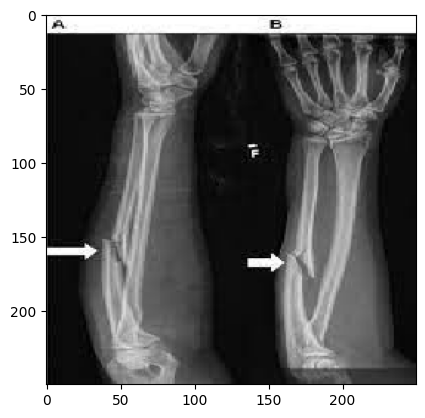

1/1 [==============================] - 0s 18ms/step
0
fractured


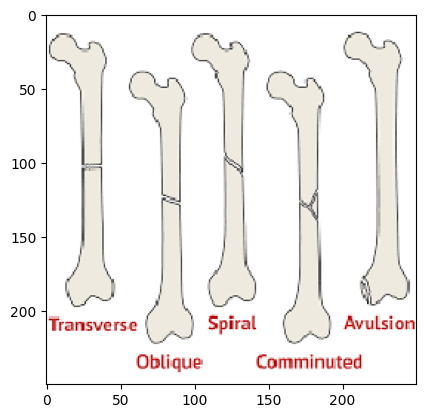

1/1 [==============================] - 0s 21ms/step
0
fractured


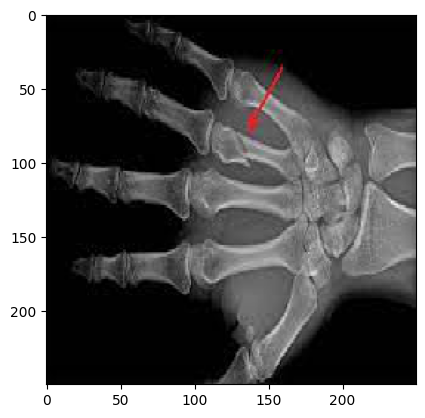

1/1 [==============================] - 0s 19ms/step
1
not_fractured


IsADirectoryError: ignored

In [ ]:
test_dir="/content/drive/MyDrive/Colab Notebooks/bone_classifier/test/fractured"
for i in os.listdir(test_dir):
  img = image.load_img(test_dir+"//"+i, target_size=(250,250,3))
  plt.imshow(img)
  plt.show()

  X =image.img_to_array(img)
  X =np.expand_dims(X,axis=0)
  images = np.vstack([X])
  pred = best_model.predict(images)
  val = np.array(pred)
  v = val.argmax()
  print(v)
  if v == 0:
    print("fractured")
  else:
    print("not_fractured")
